In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

Implementing:

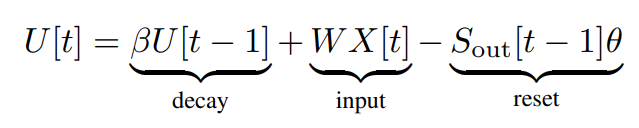

Random 3 inputs $X$ and weights $W$ for 10 timesteps. Beta is usually set manually, but could be learnable as well.

In [6]:
X = np.random.random(size=(3, 10))
W = np.random.random(size=(3, 1))
Beta = 0.9
print("Weights: \n", W)
print("Inputs: \n", X)
print("Beta: \n", Beta)

Weights: 
 [[0.299]
 [0.528]
 [0.523]]
Inputs: 
 [[0.358 0.513 0.378 0.897 0.048 0.432 0.838 0.533 0.718 0.776]
 [0.044 0.826 0.628 0.518 0.669 0.957 0.066 0.198 0.214 0.763]
 [0.586 0.81  0.702 0.389 0.477 0.287 0.463 0.14  0.055 0.363]]
Beta: 
 0.9


Examplary current $I = WX[t]$:

In [7]:
W * X[:, 1, None]

array([[0.154],
       [0.436],
       [0.423]])

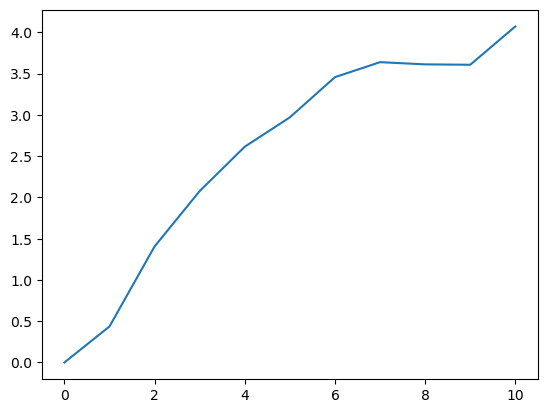

In [14]:
membrane_potential = [0]
for t in range(10):
    I = (W * X[:, t, None]).sum()
    U = Beta * membrane_potential[-1] + I
    membrane_potential.append(U)

plt.plot(membrane_potential)

Not bad but we would like to get something that looks like this qualitatively:

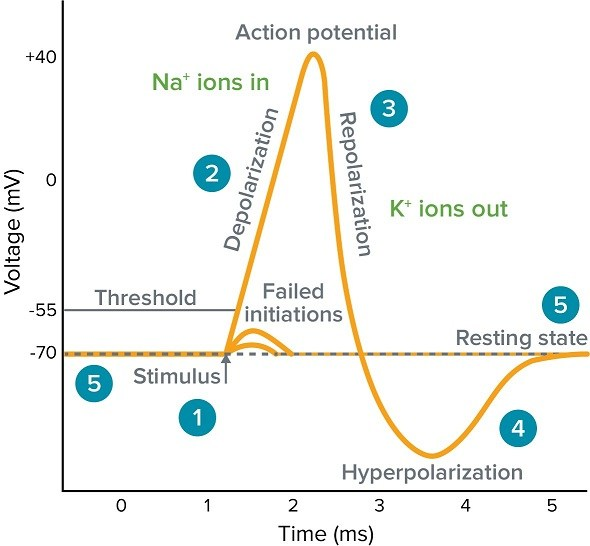

For that there has to exist the firing threshold $\theta$ and potential reset mechanism. The $-S_{out}[t-1]\theta$ part of the equation we implement.

The $S_{out} = 1 \text{ if } U > \theta \text{ else } 0$ 

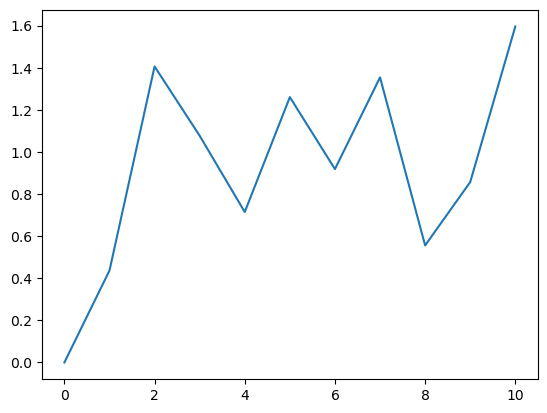

In [20]:
Theta = 1
membrane_potential = [0]
spikes = []
for t in range(10):
    I = (W * X[:, t, None]).sum()
    U = Beta * membrane_potential[-1] + I
    if membrane_potential[-1] > Theta:
        U -= Theta * 1
        S_out = 1
    else:
        S_out = 0
    spikes.append(S_out) 
    membrane_potential.append(U)

plt.plot(membrane_potential)